In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

In [2]:
# define root directory of the data and the file...
root_dir = '/home/alex/Documents/capstone-ml/'
file = 'data_2009-2017_1d.csv'

# read the data and show first five samples
ask_data = pd.read_csv(root_dir+file, low_memory=True, usecols=['Date', 'open', 'high', 'low', 'close'], index_col = ['Date'])
ask_data.head()

,open,high,low,close
Date,,,,
2009-05-01,1.32436,1.33282,1.32274,1.32729
2009-05-03,1.32731,1.32920,1.32714,1.32882
2009-05-04,1.32878,1.34379,1.32123,1.34155
2009-05-05,1.34155,1.34355,1.32822,1.33037
2009-05-06,1.33030,1.33746,1.32460,1.33000


In [3]:
from sklearn.svm import LinearSVR

# the function takes the price dataframe and the n-days, where n defines how many previous close prices should be
# considered as, it then trains a linearSVR and calculates the R2 score for each window-size (from 2-n)
# the function returns the score and MSR in a 2d-list

def pipeline(n, price_data):
    
    R2_MSE = []
    
    for i in range(2,n):
        
        data = price_data.dropna().copy()
        
        for j in range(1,i):
    
            close_n = data['close'].shift(j)
            high_n = data['high'].shift(j)
            low_n = data['low'].shift(j)
            open_n = data['open'].shift(j)
    
            data[str('close-'+str(j))] = close_n.values
    
        data.dropna(inplace = True)
    
        features = data.drop(['high','low','open','close'], axis = 1)
        X_train = np.array(features[:-500].values)
        y_train = np.array(data['close'][:-500].values)
        X_test = np.array(features[-500:].values)
        y_test = np.array(data['close'][-500:].values)

        
        clf = LinearSVR(random_state=88)
        model = clf.fit(X_train, y_train)
        predictions = model.predict(X_test)
    
        print("Finished n = "+str(i))

        R2_MSE.append([model.score(X_test, y_test), mean_squared_error(y_test, predictions)])
        
    return R2_MSE

In [4]:
R2_MSE = pipeline(51, ask_data)

Finished n = 2
Finished n = 3
Finished n = 4
Finished n = 5
Finished n = 6
Finished n = 7
Finished n = 8
Finished n = 9
Finished n = 10
Finished n = 11
Finished n = 12
Finished n = 13
Finished n = 14
Finished n = 15
Finished n = 16
Finished n = 17
Finished n = 18
Finished n = 19
Finished n = 20
Finished n = 21
Finished n = 22
Finished n = 23
Finished n = 24
Finished n = 25
Finished n = 26
Finished n = 27
Finished n = 28
Finished n = 29
Finished n = 30
Finished n = 31
Finished n = 32
Finished n = 33
Finished n = 34
Finished n = 35
Finished n = 36
Finished n = 37
Finished n = 38
Finished n = 39
Finished n = 40
Finished n = 41
Finished n = 42
Finished n = 43
Finished n = 44
Finished n = 45
Finished n = 46
Finished n = 47
Finished n = 48
Finished n = 49
Finished n = 50


3

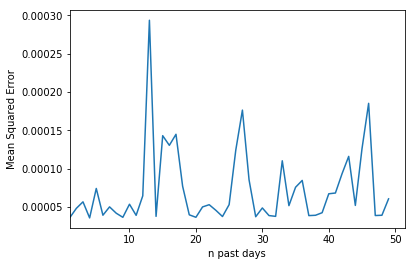

In [5]:
MSE = [R2_MSE[i][1] for i in range(len(R2_MSE))]
R2 = [R2_MSE[i][0] for i in range(len(R2_MSE))]
plt.plot(range(1,len(MSE)+1), MSE)
plt.xlabel("n past days")
plt.ylabel("Mean Squared Error")
plt.xlim(xmin=1)

# find the lowest error and repeat the index
# the index + 1 defines the window-size with the lowest error, and therefore the choice
MSE.index(min(MSE))